<a href="https://colab.research.google.com/github/akshaya-sridhar/CAC01/blob/master/STD_lab01_and_lab02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
data = pd.read_csv("/content/drive/My Drive/Colab Notebooks/data/Chicago_Crimes_2012_to_2017.csv")

In [3]:
data

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,3,10508693,HZ250496,05/03/2016 11:40:00 PM,013XX S SAWYER AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,...,24.0,29.0,08B,1154907.0,1893681.0,2016,05/10/2016 03:56:50 PM,41.864073,-87.706819,"(41.864073157, -87.706818608)"
1,89,10508695,HZ250409,05/03/2016 09:40:00 PM,061XX S DREXEL AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,...,20.0,42.0,08B,1183066.0,1864330.0,2016,05/10/2016 03:56:50 PM,41.782922,-87.604363,"(41.782921527, -87.60436317)"
2,197,10508697,HZ250503,05/03/2016 11:31:00 PM,053XX W CHICAGO AVE,0470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,...,37.0,25.0,24,1140789.0,1904819.0,2016,05/10/2016 03:56:50 PM,41.894908,-87.758372,"(41.894908283, -87.758371958)"
3,673,10508698,HZ250424,05/03/2016 10:10:00 PM,049XX W FULTON ST,0460,BATTERY,SIMPLE,SIDEWALK,False,...,28.0,25.0,08B,1143223.0,1901475.0,2016,05/10/2016 03:56:50 PM,41.885687,-87.749516,"(41.885686845, -87.749515983)"
4,911,10508699,HZ250455,05/03/2016 10:00:00 PM,003XX N LOTUS AVE,0820,THEFT,$500 AND UNDER,RESIDENCE,False,...,28.0,25.0,06,1139890.0,1901675.0,2016,05/10/2016 03:56:50 PM,41.886297,-87.761751,"(41.886297242, -87.761750709)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456709,6250330,10508679,HZ250507,05/03/2016 11:33:00 PM,026XX W 23RD PL,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,...,28.0,30.0,08B,1159105.0,1888300.0,2016,05/10/2016 03:56:50 PM,41.849222,-87.691556,"(41.849222028, -87.69155551)"
1456710,6251089,10508680,HZ250491,05/03/2016 11:30:00 PM,073XX S HARVARD AVE,1310,CRIMINAL DAMAGE,TO PROPERTY,APARTMENT,True,...,17.0,69.0,14,1175230.0,1856183.0,2016,05/10/2016 03:56:50 PM,41.760744,-87.633335,"(41.760743949, -87.63333531)"
1456711,6251349,10508681,HZ250479,05/03/2016 12:15:00 AM,024XX W 63RD ST,041A,BATTERY,AGGRAVATED: HANDGUN,SIDEWALK,False,...,15.0,66.0,04B,1161027.0,1862810.0,2016,05/10/2016 03:56:50 PM,41.779235,-87.685207,"(41.779234743, -87.685207125)"
1456712,6253257,10508690,HZ250370,05/03/2016 09:07:00 PM,082XX S EXCHANGE AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,SIDEWALK,False,...,7.0,46.0,08B,1197261.0,1850727.0,2016,05/10/2016 03:56:50 PM,41.745252,-87.552773,"(41.745251975, -87.552773464)"


In [4]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 15.2 MB/s 
     |████████████████████████████████| 16.7 MB 39.1 MB/s 
     |████████████████████████████████| 6.3 MB 66.5 MB/s 


In [5]:
import pandas as pd
import geopandas as gpd

import matplotlib # base python plotting library
import matplotlib.pyplot as plt # submodule of matplotlib

# To display plots, maps, charts etc in the notebook
%matplotlib inline  

In [6]:
data.drop(labels=['Case Number','ID', 'Block', 'Ward', 'Community Area', 'FBI Code', 'Year', 'Updated On',
                 'Latitude','Longitude', 'Beat'] , inplace=True, axis=1)

In [7]:
data

,Unnamed: 0,Date,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,District,X Coordinate,Y Coordinate,Location
0,3,05/03/2016 11:40:00 PM,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,True,10.0,1154907.0,1893681.0,"(41.864073157, -87.706818608)"
1,89,05/03/2016 09:40:00 PM,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,3.0,1183066.0,1864330.0,"(41.782921527, -87.60436317)"
2,197,05/03/2016 11:31:00 PM,0470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,False,15.0,1140789.0,1904819.0,"(41.894908283, -87.758371958)"
3,673,05/03/2016 10:10:00 PM,0460,BATTERY,SIMPLE,SIDEWALK,False,False,15.0,1143223.0,1901475.0,"(41.885686845, -87.749515983)"
4,911,05/03/2016 10:00:00 PM,0820,THEFT,$500 AND UNDER,RESIDENCE,False,True,15.0,1139890.0,1901675.0,"(41.886297242, -87.761750709)"
...,...,...,...,...,...,...,...,...,...,...,...,...
1456709,6250330,05/03/2016 11:33:00 PM,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,True,10.0,1159105.0,1888300.0,"(41.849222028, -87.69155551)"
1456710,6251089,05/03/2016 11:30:00 PM,1310,CRIMINAL DAMAGE,TO PROPERTY,APARTMENT,True,True,7.0,1175230.0,1856183.0,"(41.760743949, -87.63333531)"
1456711,6251349,05/03/2016 12:15:00 AM,041A,BATTERY,AGGRAVATED: HANDGUN,SIDEWALK,False,False,8.0,1161027.0,1862810.0,"(41.779234743, -87.685207125)"
1456712,6253257,05/03/2016 09:07:00 PM,0486,BATTERY,DOMESTIC BATTERY SIMPLE,SIDEWALK,False,True,4.0,1197261.0,1850727.0,"(41.745251975, -87.552773464)"


In [8]:
# convert dates to pandas datetime format
data.Date = pd.to_datetime(data.Date, format='%m/%d/%Y %I:%M:%S %p')
# setting the index to be the date will help us a lot later on
data.index = pd.DatetimeIndex(data.Date)

In [ ]:
data.head(10)

,Unnamed: 0,Date,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,District,X Coordinate,Y Coordinate,Location
Date,,,,,,,,,,,,
2016-05-03 23:40:00,3,2016-05-03 23:40:00,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,True,10.0,1154907.0,1893681.0,"(41.864073157, -87.706818608)"
2016-05-03 21:40:00,89,2016-05-03 21:40:00,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,3.0,1183066.0,1864330.0,"(41.782921527, -87.60436317)"
2016-05-03 23:31:00,197,2016-05-03 23:31:00,0470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,False,15.0,1140789.0,1904819.0,"(41.894908283, -87.758371958)"
2016-05-03 22:10:00,673,2016-05-03 22:10:00,0460,BATTERY,SIMPLE,SIDEWALK,False,False,15.0,1143223.0,1901475.0,"(41.885686845, -87.749515983)"
2016-05-03 22:00:00,911,2016-05-03 22:00:00,0820,THEFT,$500 AND UNDER,RESIDENCE,False,True,15.0,1139890.0,1901675.0,"(41.886297242, -87.761750709)"
2016-05-03 22:35:00,1108,2016-05-03 22:35:00,041A,BATTERY,AGGRAVATED: HANDGUN,STREET,False,False,6.0,1183336.0,1850642.0,"(41.745354023, -87.603798903)"
2016-05-03 22:30:00,1130,2016-05-03 22:30:00,0460,BATTERY,SIMPLE,CHA HALLWAY/STAIRWELL/ELEVATOR,False,False,1.0,1176730.0,1886544.0,"(41.844023772, -87.626923253)"
2016-05-03 21:30:00,1801,2016-05-03 21:30:00,0460,BATTERY,SIMPLE,RESIDENCE PORCH/HALLWAY,False,False,2.0,1178514.0,1874573.0,"(41.811133958, -87.62074077)"
2016-05-03 16:00:00,1868,2016-05-03 16:00:00,0460,BATTERY,SIMPLE,SIDEWALK,False,False,24.0,1165696.0,1942616.0,"(41.99813061, -87.665814038)"


In [9]:
import numpy as np
data[['X Coordinate', 'Y Coordinate']] = data[['X Coordinate', 'Y Coordinate']].replace(0, np.nan)
data.dropna()

,Unnamed: 0,Date,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,District,X Coordinate,Y Coordinate,Location
Date,,,,,,,,,,,,
2016-05-03 23:40:00,3,2016-05-03 23:40:00,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,True,10.0,1154907.0,1893681.0,"(41.864073157, -87.706818608)"
2016-05-03 21:40:00,89,2016-05-03 21:40:00,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,3.0,1183066.0,1864330.0,"(41.782921527, -87.60436317)"
2016-05-03 23:31:00,197,2016-05-03 23:31:00,0470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,False,15.0,1140789.0,1904819.0,"(41.894908283, -87.758371958)"
2016-05-03 22:10:00,673,2016-05-03 22:10:00,0460,BATTERY,SIMPLE,SIDEWALK,False,False,15.0,1143223.0,1901475.0,"(41.885686845, -87.749515983)"
2016-05-03 22:00:00,911,2016-05-03 22:00:00,0820,THEFT,$500 AND UNDER,RESIDENCE,False,True,15.0,1139890.0,1901675.0,"(41.886297242, -87.761750709)"
...,...,...,...,...,...,...,...,...,...,...,...,...
2016-05-03 23:33:00,6250330,2016-05-03 23:33:00,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,True,10.0,1159105.0,1888300.0,"(41.849222028, -87.69155551)"
2016-05-03 23:30:00,6251089,2016-05-03 23:30:00,1310,CRIMINAL DAMAGE,TO PROPERTY,APARTMENT,True,True,7.0,1175230.0,1856183.0,"(41.760743949, -87.63333531)"
2016-05-03 00:15:00,6251349,2016-05-03 00:15:00,041A,BATTERY,AGGRAVATED: HANDGUN,SIDEWALK,False,False,8.0,1161027.0,1862810.0,"(41.779234743, -87.685207125)"


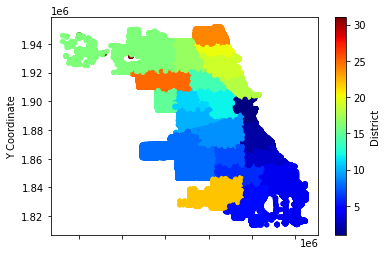

In [ ]:
data.plot(kind='scatter',x='X Coordinate', y='Y Coordinate', c='District', cmap=plt.get_cmap('jet'))

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2182: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 864x864 with 0 Axes>

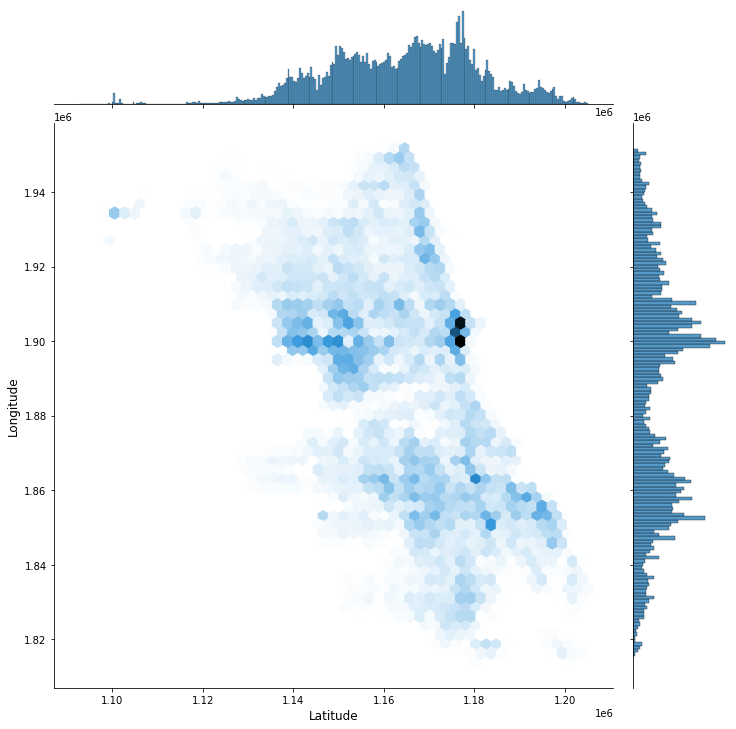

In [ ]:
import seaborn as sns
plt.figure(figsize=(12,12))
sns.jointplot(x=data['X Coordinate'].values, y=data['Y Coordinate'].values, size=10, kind='hex')
plt.ylabel('Longitude', fontsize=12)
plt.xlabel('Latitude', fontsize=12)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 864x864 with 0 Axes>

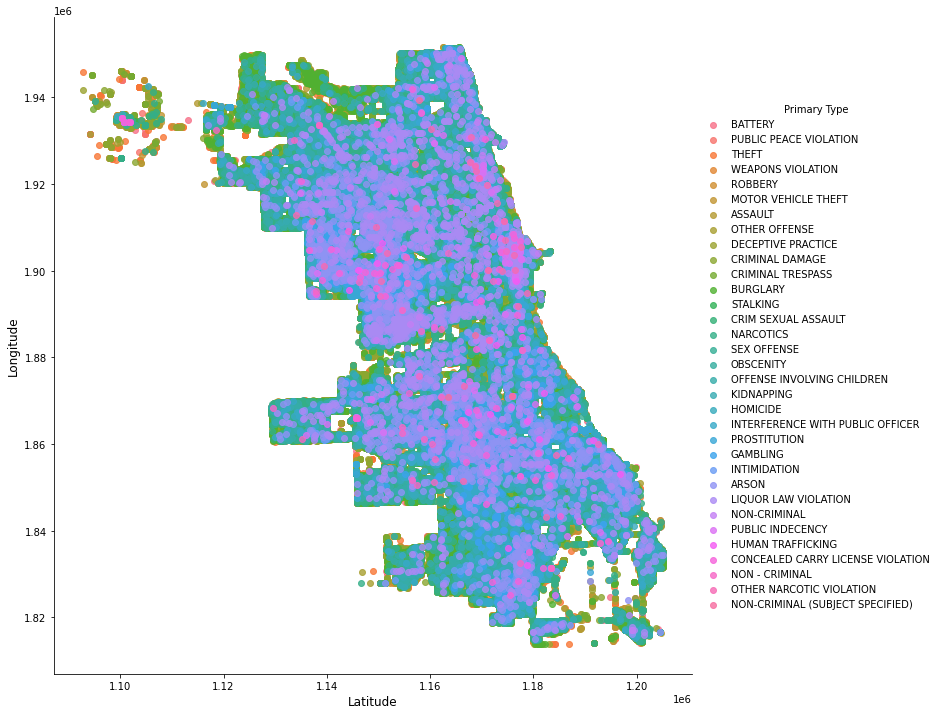

In [ ]:
plt.figure(figsize=(12,12))
sns.lmplot(x='X Coordinate', y='Y Coordinate', size=10, hue='Primary Type', data=data, fit_reg=False)
plt.ylabel('Longitude', fontsize=12)
plt.xlabel('Latitude', fontsize=12)
plt.show()

In [10]:
!pip install scikit-mobility

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 154 kB 13.1 MB/s 
     |████████████████████████████████| 1.1 MB 69.9 MB/s 
     |████████████████████████████████| 994 kB 57.9 MB/s 
     |████████████████████████████████| 62 kB 1.5 MB/s 
     |████████████████████████████████| 3.1 MB 61.4 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: geopandas
    Found existing installation: geopandas 0.10.2
    Uninstalling geopandas-0.10.2:
      Successfully uninstalled geopandas-0.10.2


In [16]:
import skmob
import pandas as pd
data = pd.read_csv("/content/drive/My Drive/Colab Notebooks/data/Chicago_Crimes_2012_to_2017.csv")

In [ ]:
data

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,3,10508693,HZ250496,05/03/2016 11:40:00 PM,013XX S SAWYER AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,...,24.0,29.0,08B,1154907.0,1893681.0,2016,05/10/2016 03:56:50 PM,41.864073,-87.706819,"(41.864073157, -87.706818608)"
1,89,10508695,HZ250409,05/03/2016 09:40:00 PM,061XX S DREXEL AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,...,20.0,42.0,08B,1183066.0,1864330.0,2016,05/10/2016 03:56:50 PM,41.782922,-87.604363,"(41.782921527, -87.60436317)"
2,197,10508697,HZ250503,05/03/2016 11:31:00 PM,053XX W CHICAGO AVE,0470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,...,37.0,25.0,24,1140789.0,1904819.0,2016,05/10/2016 03:56:50 PM,41.894908,-87.758372,"(41.894908283, -87.758371958)"
3,673,10508698,HZ250424,05/03/2016 10:10:00 PM,049XX W FULTON ST,0460,BATTERY,SIMPLE,SIDEWALK,False,...,28.0,25.0,08B,1143223.0,1901475.0,2016,05/10/2016 03:56:50 PM,41.885687,-87.749516,"(41.885686845, -87.749515983)"
4,911,10508699,HZ250455,05/03/2016 10:00:00 PM,003XX N LOTUS AVE,0820,THEFT,$500 AND UNDER,RESIDENCE,False,...,28.0,25.0,06,1139890.0,1901675.0,2016,05/10/2016 03:56:50 PM,41.886297,-87.761751,"(41.886297242, -87.761750709)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456709,6250330,10508679,HZ250507,05/03/2016 11:33:00 PM,026XX W 23RD PL,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,...,28.0,30.0,08B,1159105.0,1888300.0,2016,05/10/2016 03:56:50 PM,41.849222,-87.691556,"(41.849222028, -87.69155551)"
1456710,6251089,10508680,HZ250491,05/03/2016 11:30:00 PM,073XX S HARVARD AVE,1310,CRIMINAL DAMAGE,TO PROPERTY,APARTMENT,True,...,17.0,69.0,14,1175230.0,1856183.0,2016,05/10/2016 03:56:50 PM,41.760744,-87.633335,"(41.760743949, -87.63333531)"
1456711,6251349,10508681,HZ250479,05/03/2016 12:15:00 AM,024XX W 63RD ST,041A,BATTERY,AGGRAVATED: HANDGUN,SIDEWALK,False,...,15.0,66.0,04B,1161027.0,1862810.0,2016,05/10/2016 03:56:50 PM,41.779235,-87.685207,"(41.779234743, -87.685207125)"
1456712,6253257,10508690,HZ250370,05/03/2016 09:07:00 PM,082XX S EXCHANGE AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,SIDEWALK,False,...,7.0,46.0,08B,1197261.0,1850727.0,2016,05/10/2016 03:56:50 PM,41.745252,-87.552773,"(41.745251975, -87.552773464)"


In [ ]:
data[['X Coordinate', 'Y Coordinate']] = data[['X Coordinate', 'Y Coordinate']].replace(0, np.nan)
data.dropna(inplace=True)

In [ ]:
tdf = skmob.TrajDataFrame(data,'Latitude','Longitude','Date' )

In [ ]:
tdf.head()

,Unnamed: 0,ID,Case Number,datetime,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,lat,lng,Location
0,3,10508693,HZ250496,2016-05-03 23:40:00,013XX S SAWYER AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,...,24.0,29.0,08B,1154907.0,1893681.0,2016,05/10/2016 03:56:50 PM,41.864073,-87.706819,"(41.864073157, -87.706818608)"
1,89,10508695,HZ250409,2016-05-03 21:40:00,061XX S DREXEL AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,...,20.0,42.0,08B,1183066.0,1864330.0,2016,05/10/2016 03:56:50 PM,41.782922,-87.604363,"(41.782921527, -87.60436317)"
2,197,10508697,HZ250503,2016-05-03 23:31:00,053XX W CHICAGO AVE,0470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,...,37.0,25.0,24,1140789.0,1904819.0,2016,05/10/2016 03:56:50 PM,41.894908,-87.758372,"(41.894908283, -87.758371958)"
3,673,10508698,HZ250424,2016-05-03 22:10:00,049XX W FULTON ST,0460,BATTERY,SIMPLE,SIDEWALK,False,...,28.0,25.0,08B,1143223.0,1901475.0,2016,05/10/2016 03:56:50 PM,41.885687,-87.749516,"(41.885686845, -87.749515983)"
4,911,10508699,HZ250455,2016-05-03 22:00:00,003XX N LOTUS AVE,0820,THEFT,$500 AND UNDER,RESIDENCE,False,...,28.0,25.0,06,1139890.0,1901675.0,2016,05/10/2016 03:56:50 PM,41.886297,-87.761751,"(41.886297242, -87.761750709)"


In [ ]:
tdf.plot_trajectory(zoom=12, weight=3, opacity=0.9, tiles='Stamen Toner')

/usr/local/lib/python3.7/dist-packages/skmob/core/trajectorydataframe.py:571: UserWarning: Only the trajectories of the first 10 users will be plotted. Use the argument `max_users` to specify the desired number of users, or filter the TrajDataFrame.
  start_end_markers=start_end_markers, control_scale=control_scale)
/usr/local/lib/python3.7/dist-packages/skmob/core/trajectorydataframe.py:571: UserWarning: If necessary, trajectories will be down-sampled to have at most `max_points` points. To avoid this, specify `max_points=None`.
  start_end_markers=start_end_markers, control_scale=control_scale)


# Temporal Analysis

In [19]:
#set date as the index 
data.index = pd.DatetimeIndex(data.Date)

In [20]:
data.resample('Y').size()

Date
2012-12-31    335670
2013-12-31    306703
2014-12-31    274527
2015-12-31    262995
2016-12-31    265462
2017-12-31     11357
Freq: A-DEC, dtype: int64

Text(0, 0.5, 'Number of Crimes')

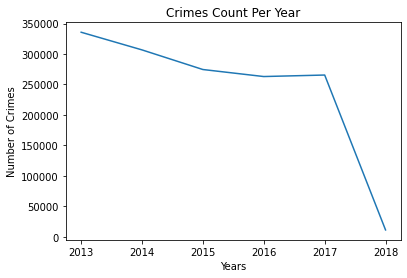

In [22]:
plt.plot(data.resample('Y').size())
plt.title('Crimes Count Per Year')
plt.xlabel('Years')
plt.ylabel('Number of Crimes')

In [24]:
data.resample('M').size()

Date
2012-01-31    26194
2012-02-29    23847
2012-03-31    28533
2012-04-30    27164
2012-05-31    30067
              ...  
2016-09-30    23235
2016-10-31    23314
2016-11-30    21140
2016-12-31    19580
2017-01-31    11357
Freq: M, Length: 61, dtype: int64

Text(0, 0.5, 'Number of Crimes')

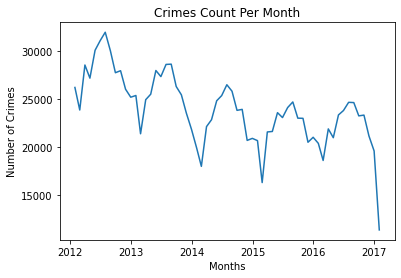

In [26]:
plt.plot(data.resample('M').size())
plt.title('Crimes Count Per Month')
plt.xlabel('Months')
plt.ylabel('Number of Crimes')

In [27]:
data.resample('Q').size()

Date
2012-03-31    78574
2012-06-30    88283
2012-09-30    89685
2012-12-31    79128
2013-03-31    71651
2013-06-30    80776
2013-09-30    83510
2013-12-31    70766
2014-03-31    59964
2014-06-30    72991
2014-09-30    76090
2014-12-31    65482
2015-03-31    58503
2015-06-30    68239
2015-09-30    71782
2015-12-31    64471
2016-03-31    60843
2016-06-30    68085
2016-09-30    72500
2016-12-31    64034
2017-03-31    11357
Freq: Q-DEC, dtype: int64

Text(0, 0.5, 'Number of Crimes')

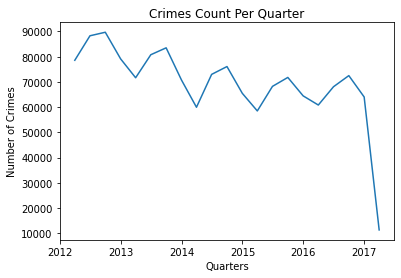

In [28]:
plt.plot(data.resample('Q').size())
plt.title('Crimes Count Per Quarter')
plt.xlabel('Quarters')
plt.ylabel('Number of Crimes')

In [29]:
chicago_df = data.resample('D').size().reset_index()

In [30]:
chicago_df

,Date,0
0,2012-01-01,1451
1,2012-01-02,700
2,2012-01-03,805
3,2012-01-04,799
4,2012-01-05,871
...,...,...
1840,2017-01-14,649
1841,2017-01-15,600
1842,2017-01-16,611
1843,2017-01-17,659


In [31]:
chicago_df = chicago_df.rename(columns={'Date':'ds', 0:'y'})

In [32]:
chicago_df

,ds,y
0,2012-01-01,1451
1,2012-01-02,700
2,2012-01-03,805
3,2012-01-04,799
4,2012-01-05,871
...,...,...
1840,2017-01-14,649
1841,2017-01-15,600
1842,2017-01-16,611
1843,2017-01-17,659


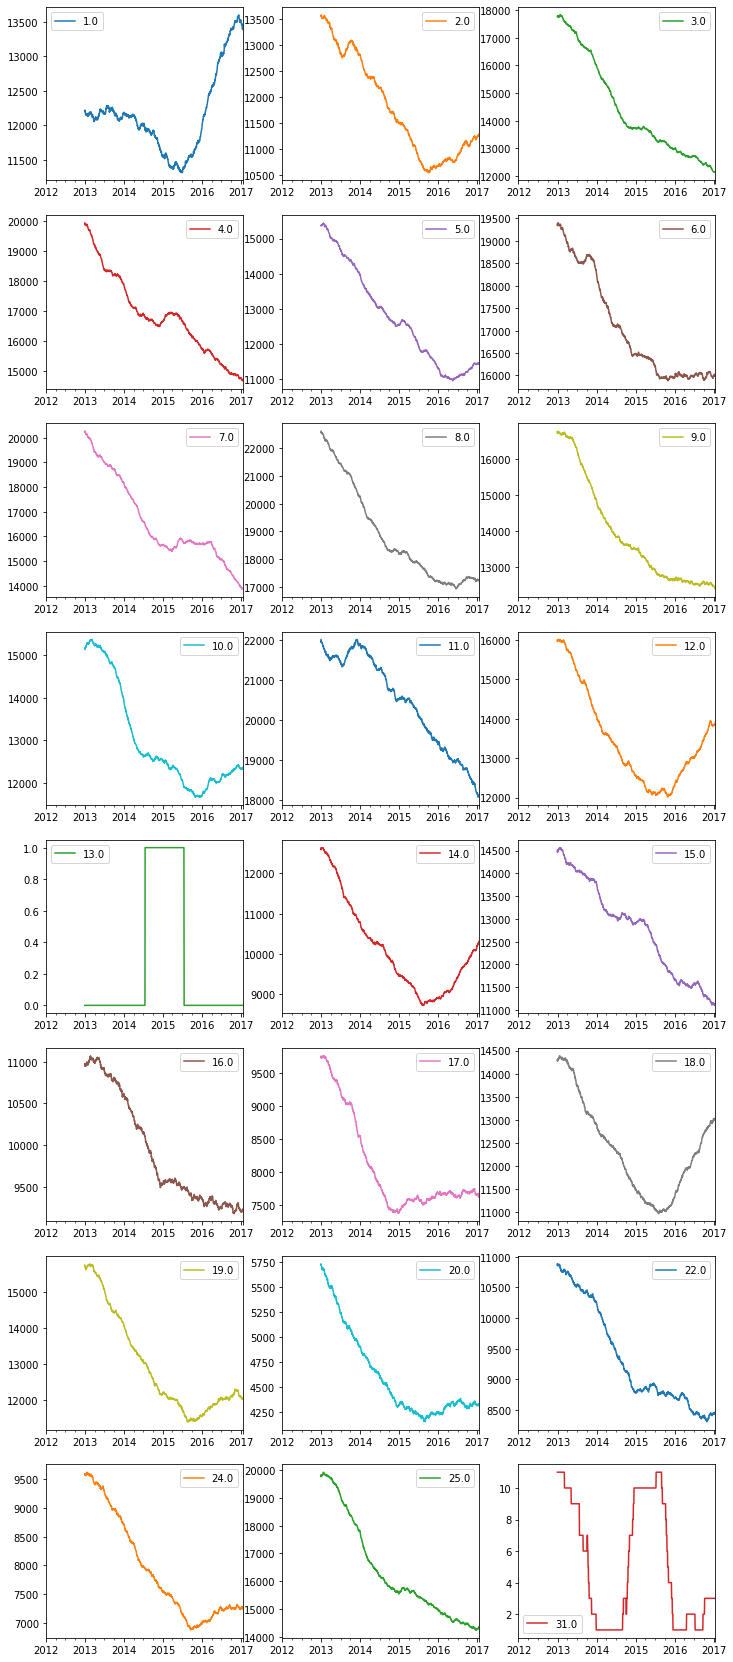

In [37]:
crimes_per_district = data.pivot_table('Date', aggfunc=np.size, columns='District', index=data.index.date, fill_value=0)
crimes_per_district.index = pd.DatetimeIndex(crimes_per_district.index)
plo = crimes_per_district.rolling(365).sum().plot(figsize=(12, 30), subplots=True, layout=(-1, 3), sharex=False, sharey=False)

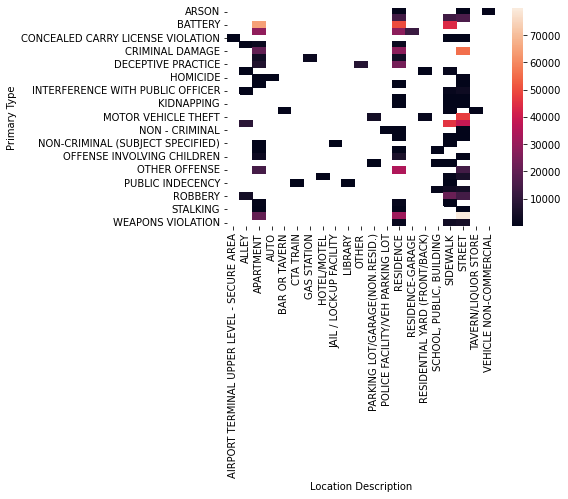

In [39]:
# heatmap indicating the frequency of each crime per Location Description 
#- where does each particular crime type occur more often.
import seaborn as sns

#where does each crime occur more often
topk_loc_descr = data.groupby(['Primary Type', 'Location Description']).size().reset_index(name='counts').groupby('Primary Type').apply(lambda x: x.sort_values('counts',ascending=False).head(3))
pivotdf = topk_loc_descr.pivot(index='Primary Type', columns='Location Description', values='counts')
sns.heatmap(pivotdf)